In [4]:
import sys
sys.path.insert(0, '../../utils')
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import Fidelity_Measure as fm
import Purity_Measure as PM
import os

In [5]:

# model driven read
# print(os.getcwd())
fm_list, fm_av, model_dms, params_list, plist, pmean = pd.read_pickle('../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_plist_pmean_alpha_HS_Haar_eta_vary.pickle')
fm_list_b, fm_av_b, model_dms_b, params_list_b, plist_b, pmean_b = pd.read_pickle('../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_plist_pmean_alpha_Brian_25_eta_vary.pickle')
fm_list_ma, fm_av_ma, model_dms_ma, params_list_ma, plist_ma, pmean_ma = pd.read_pickle('../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_plist_pmean_alpha_0.8_eta_vary.pickle')

mle_fids_list, mle_av, dm_target, dm_fitted = pd.read_pickle('../../mle_outputs/convoluted_mle_fids_list_fids_mean_shots_1024.pickle')


fm_array = np.array(fm_list)
print(fm_array.shape)
fm_std = fm_array.std(axis=1)
fm_av = np.array(fm_av)

p_array = np.array(plist)
print(p_array.shape)
p_std = p_array.std(axis=1)
p_mean = np.array(pmean)

fm_array_b = np.array(fm_list_b)
print(fm_array_b.shape)
fm_std_b = fm_array_b.std(axis=1)
fm_av_b = np.array(fm_av_b)

p_array_b = np.array(plist_b)
print(p_array_b.shape)
p_std_b = p_array_b.std(axis=1)
p_mean_b = np.array(pmean_b)

fm_array_ma = np.array(fm_list_ma)
print(fm_array_ma.shape)
fm_std_ma = fm_array_ma.std(axis=1)
fm_av_ma = np.array(fm_av_ma)

p_array_ma = np.array(plist_ma)
print(p_array_ma.shape)
p_std_ma = p_array_ma.std(axis=1)
p_mean_ma = np.array(pmean_ma)


eta = [0.0008, 0.002, 0.004, 0.006, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]

eta = np.array(eta)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# x, y = np.meshgrid(eta, pmean)
# ax.plot_surface(x,y,fm_array)
# plt.show()


tparray = PM.purity(dm_target)
tpmean = np.repeat(np.mean(tparray), 8)
tpstd = np.repeat(np.std(tparray), 8)

(12, 200)
(12, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)


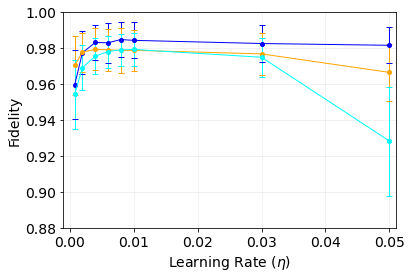

In [6]:

plt.errorbar(eta[:8], fm_av[:8], yerr=fm_std[:8], xerr=None, fmt='-bo', ecolor='b',
             elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='NN (HS-Haar)')

plt.errorbar(eta[:8], fm_av_b[:8], yerr=fm_std_b[:8], xerr=None, fmt="-o", color='orange', ecolor='orange',
             elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='NN (Z)')


plt.errorbar(eta[:8], fm_av_ma[:8], yerr=fm_std_ma[:8], xerr=None, fmt='-o', color='cyan', ecolor='cyan',
             elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=r'NN (MA: $\alpha=0.8$)')

# plt.errorbar(eta[:8], tpmean[:8], yerr=tpstd[:8], xerr=None, fmt='-ro', ecolor='r',
#              elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='IBMQ')

fs = 14
plt.grid(alpha=0.2)
plt.xlabel(r'Learning Rate ($\eta$)', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
# plt.legend()
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# plt.axis([-0.7e6, 6e6, 0.55, 1.02])
plt.subplots_adjust(bottom=0.13, left=0.13)
plt.axis([-0.001, .051, 0.88, 1.])
# plt.subplots_adjust(bottom=0.6, left=0.6)

# plt.savefig('fid_vs_params.svg', dpi=600)
# plt.savefig('eta_vs_fid.svg', dpi=600)
# plt.savefig('fid_vs_params_zoomed.svg', dpi=600)

plt.show()